In [63]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_style('darkgrid')

In [2]:
'''new_col = ['flare', 'start_date', 'start_time', 'peak', 'end', 'duration_s',
       'peak_c_s', 'total_counts', 'energy_kev', 'x_pos_asec', 'y_pos_asec',
       'radial', 'active_region_ar', 'flag_1', 'flag_2', 'flag_3', 'flag_4',
       'flag_5']'''
df = pd.read_csv('data/hessi.solar.flare.2002to2016.csv',sep=",")
#test_df.columns = new_col
df.head(3)

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN


In [3]:
new_df = pd.read_csv('data/hessi.solar.flare.2002to2016.csv',sep=",", index_col=0)
#new_df.columns = new_col
# process date / time columns
def parse_dt(sdatex,stimex):
    datex = datetime.strptime(sdatex, '%Y-%m-%d')
    timex = datetime.strptime(stimex, '%H:%M:%S')
    return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)
new_df['dt.start'] = new_df[['start.date','start.time']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
new_df['dt.peak'] = new_df[['start.date','peak']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
new_df['dt.end'] = new_df[['start.date','end']].apply(lambda x: parse_dt(x[0],x[1]), axis=1)
# clean columns
new_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)
# add new columns
new_df['year'] = new_df['dt.start'].apply(lambda col: col.year)
new_df['month'] = new_df['dt.start'].apply(lambda col: col.month)
new_df['day'] = new_df['dt.start'].apply(lambda col: col.day)

In [4]:
new_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [5]:
new_df = new_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'_flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})

In [6]:
new_df.head(5)

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,_flag_5,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,,,,,,,
2021213,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13
2021308,244,20,17400,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,2002,2,13
2021310,236,336,313392,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,2002,2,13


In [7]:
DATA_by_yr = new_df.groupby(['year'])['total_counts'].sum()
DATA_by_month = new_df.groupby(['month'])['total_counts'].sum().sort_values(ascending=False)
DATA_vs_energy = new_df.groupby(['energy_kev'])['energy_kev'].count().sort_values(ascending=False)

In [8]:
data_part = new_df.iloc[1:1000, 0:4]

In [9]:
data_part.columns

Index(['duration_s', 'peak_c_s', 'total_counts', 'energy_kev'], dtype='object')

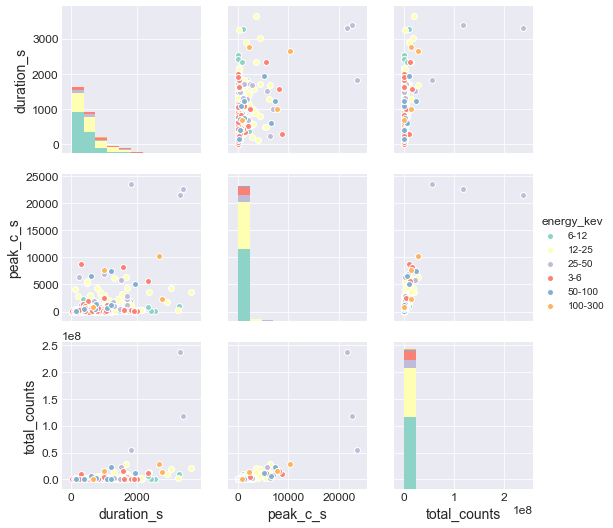

In [64]:
sns.pairplot(data=data_part, hue='energy_kev', vars=['duration_s', 'peak_c_s', 'total_counts'])

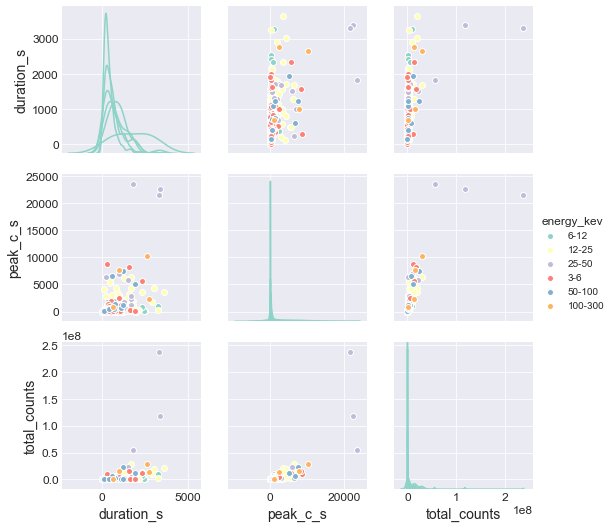

In [53]:
sns.pairplot(data=data_part, hue='energy_kev', diag_kind='kde')

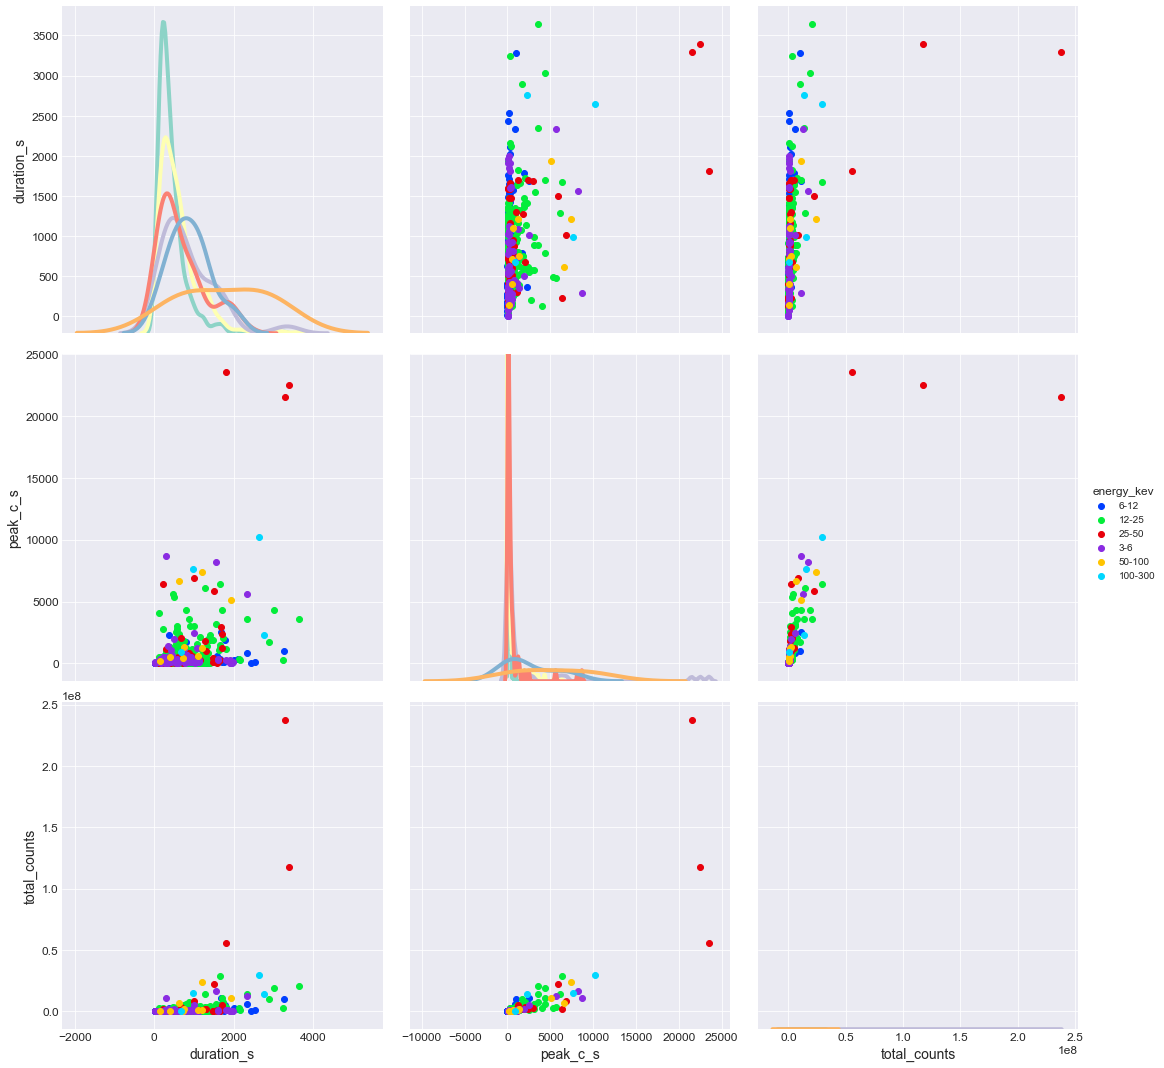

In [54]:
g =  sns.PairGrid(data_part, hue='energy_kev', palette='bright', size=5)

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs, linewidth=4)

g.map_diag(f)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

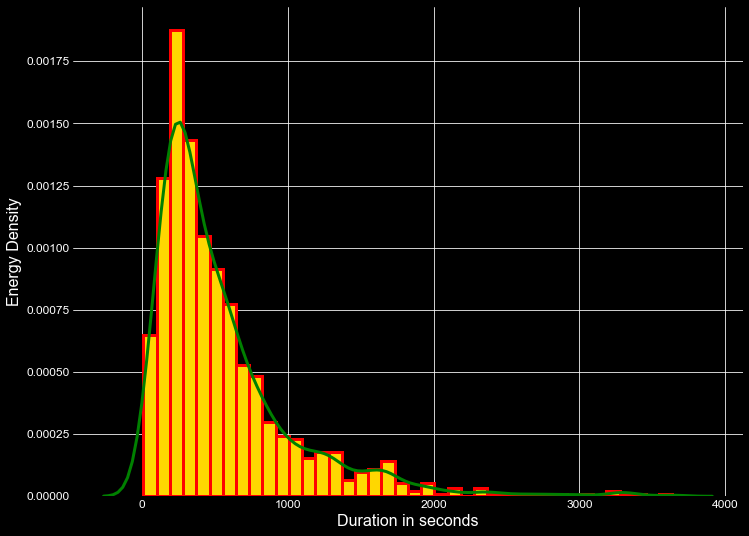

In [45]:
sns.distplot(data_part['duration_s'], kde_kws=dict(color='green', lw=3),
             hist_kws=dict(alpha=1, color= 'gold', edgecolor='red', lw=3))
plt.style.use('dark_background')
plt.xlabel('Duration in seconds', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

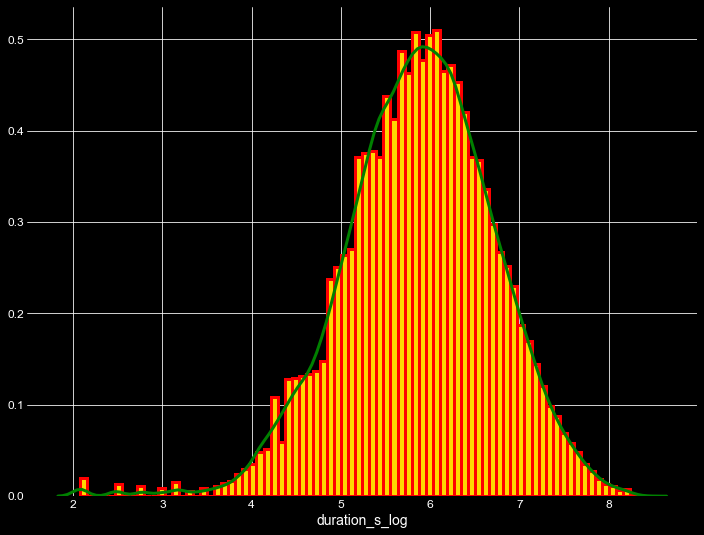

In [61]:
df['duration_s_log'] = np.log(df['duration.s'])
plt.style.use('dark_background')
sns.distplot(df['duration_s_log'], bins=80, kde_kws=dict(color='green', lw=3),
             hist_kws=dict(alpha=1, color= 'gold',edgecolor='red', lw=3))

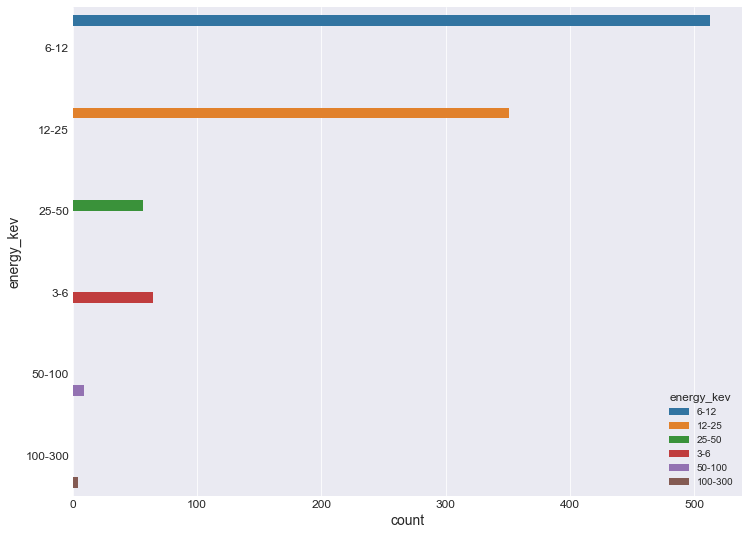

In [15]:
sns.countplot(y='energy_kev', data=data_part, hue='energy_kev')

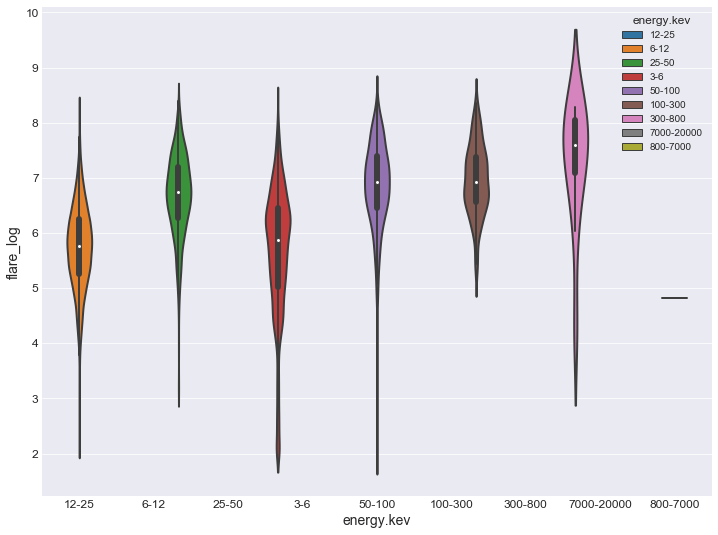

In [16]:
df['flare_log'] = np.log(df['duration.s'])
sns.violinplot(x=df['energy.kev'], y=df['flare_log'], width=3, linewidth=2, hue=df['energy.kev'])

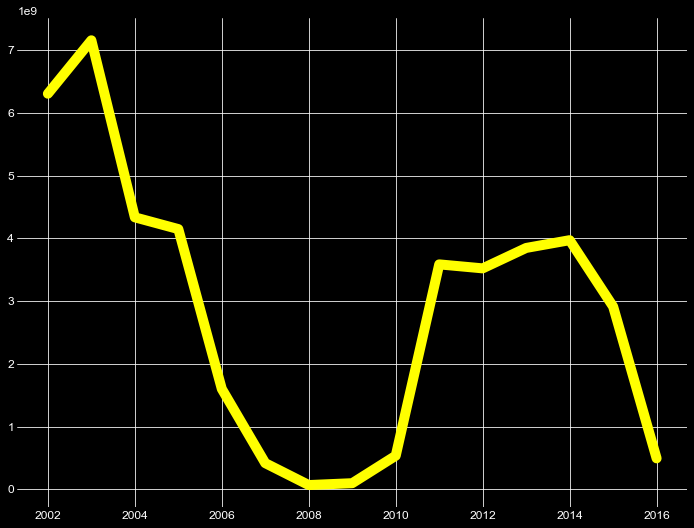

In [35]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, 'yellow', linewidth=10)

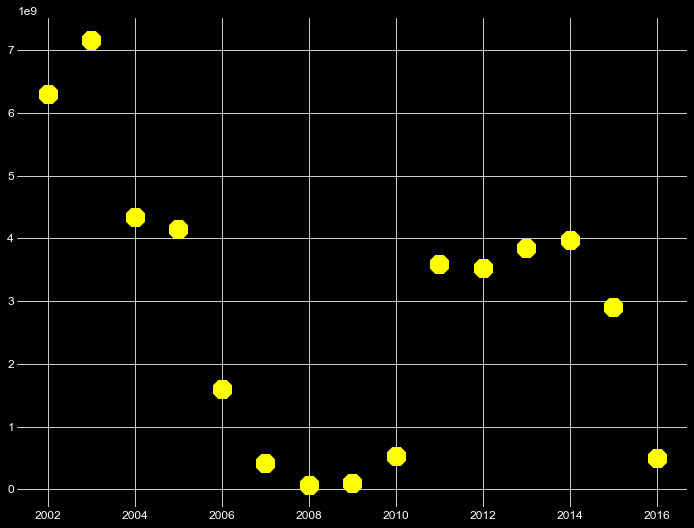

In [43]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, '8', color='yellow', markersize=20)